# Autoencoders

**importing necessary libraries**

In [ ]:
import keras
import numpy as np
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import mnist

**loading and preprocessing the data**

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

### Adding Noise

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

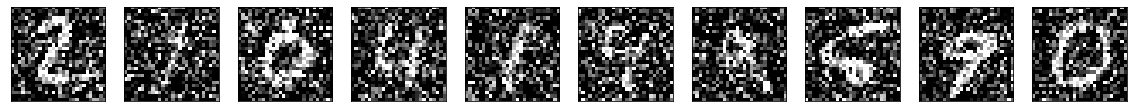

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Building Network

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

#Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


#Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 36s 8ms/step - loss: 0.2587 - val_loss: 0.1185
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1171 - val_loss: 0.1099
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1099 - val_loss: 0.1067
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1065 - val_loss: 0.1044
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1043 - val_loss: 0.1022
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1024 - val_loss: 0.1010
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1012 - val_loss: 0.0997
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1001 - val_loss: 0.0996
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0995 - val_loss: 0.0983
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0987 - val_l

### Final Output

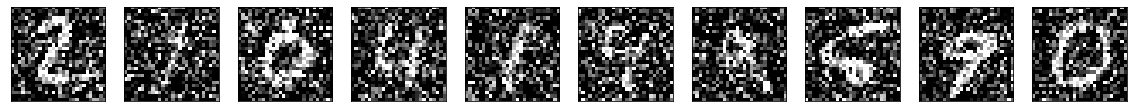

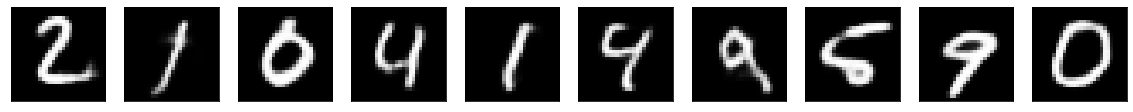

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    a = autoencoder.predict(x_test_noisy[i].reshape(1,28, 28))
    plt.imshow(a.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()